Design Recommendations (Cluster Groupings):
   Complexity  UserBase  Resources  ArchitectureType  Cluster
0           1        10          1                 1        1
1           2        50          2                 1        1
2           3       100          3                 2        1
3           4       500          5                 2        0
4           5      1000          7                 3        2
5           3       150          3                 2        1
6           2        80          2                 1        1
7           4       600          6                 2        0
8           5      1200          8                 3        2
9           1        20          1                 1        1


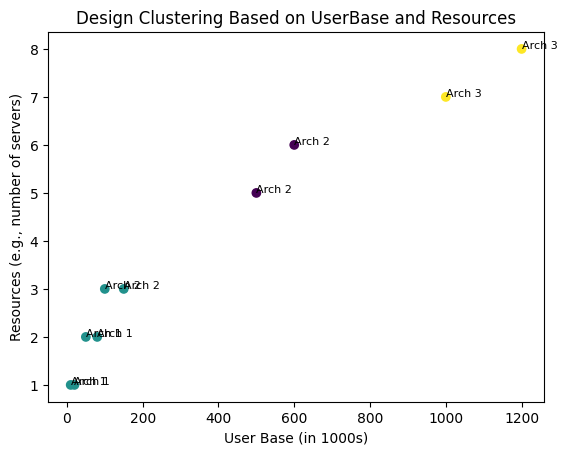

Recommended Architecture for the new project: 2 (1: Monolithic, 2: Microservices, 3: Serverless)


C:\Users\KIIT01\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample historical design data
# Each row represents a past project with the following attributes:
# - 'Complexity': Rating of project complexity (1 to 5)
# - 'UserBase': Expected number of users (in 1000s)
# - 'Resources': Available resources (e.g., number of servers)
# - 'ArchitectureType': Suggested architecture type (e.g., 1: Monolithic, 2: Microservices, 3: Serverless)

data = {
    'Complexity': [1, 2, 3, 4, 5, 3, 2, 4, 5, 1],
    'UserBase': [10, 50, 100, 500, 1000, 150, 80, 600, 1200, 20],
    'Resources': [1, 2, 3, 5, 7, 3, 2, 6, 8, 1],
    'ArchitectureType': [1, 1, 2, 2, 3, 2, 1, 2, 3, 1]  # 1: Monolithic, 2: Microservices, 3: Serverless
}

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Complexity', 'UserBase', 'Resources']])

# Step 2: Apply KMeans clustering to find design patterns
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Step 3: Output the refined design recommendations with cluster groupings
print("Design Recommendations (Cluster Groupings):")
print(df)

# Step 4: Visualize the clustering results
plt.scatter(df['UserBase'], df['Resources'], c=df['Cluster'], cmap='viridis')
plt.title("Design Clustering Based on UserBase and Resources")
plt.xlabel("User Base (in 1000s)")
plt.ylabel("Resources (e.g., number of servers)")

# Annotate points with architecture types
for i in range(len(df)):
    plt.text(df['UserBase'][i], df['Resources'][i], f"Arch {df['ArchitectureType'][i]}", fontsize=8)

plt.show()

# Step 5: Suggest architecture for a new project based on similar past designs
new_project = [[4, 300, 5]]  # Example of a new project (Complexity 4, UserBase 300k, Resources 5 servers)
new_project_scaled = scaler.transform(new_project)
predicted_cluster = kmeans.predict(new_project_scaled)
recommended_architecture = df[df['Cluster'] == predicted_cluster[0]]['ArchitectureType'].mode()[0]

print(f"Recommended Architecture for the new project: {recommended_architecture} (1: Monolithic, 2: Microservices, 3: Serverless)")
